In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame
from pandas import DataFrame
from numpy import sqrt
from pandas import DataFrame
from numpy import log

In [ ]:
#AIRLINE
Airline=pd.read_excel('/content/sample_data/Airlines+Data.xlsx')
Airline

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [ ]:
Airline.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [ ]:
data=Airline.set_index('Month')
data

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


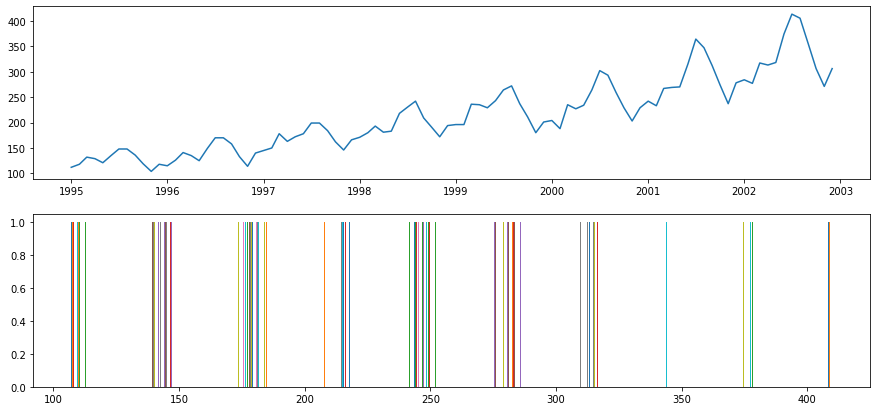

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(211)
plt.plot(data)
plt.subplot(212)
plt.hist(data)
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 1995-01-01 to 2002-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  96 non-null     int64
dtypes: int64(1)
memory usage: 1.5 KB


In [ ]:
data1=DataFrame(data.values)
data1.columns=['Passengers']
data1['Passengers']=sqrt(data1['Passengers'])
data1

,Passengers
0,10.583005
1,10.862780
2,11.489125
3,11.357817
4,11.000000
...,...
91,20.124612
92,18.841444
93,17.492856
94,16.462078


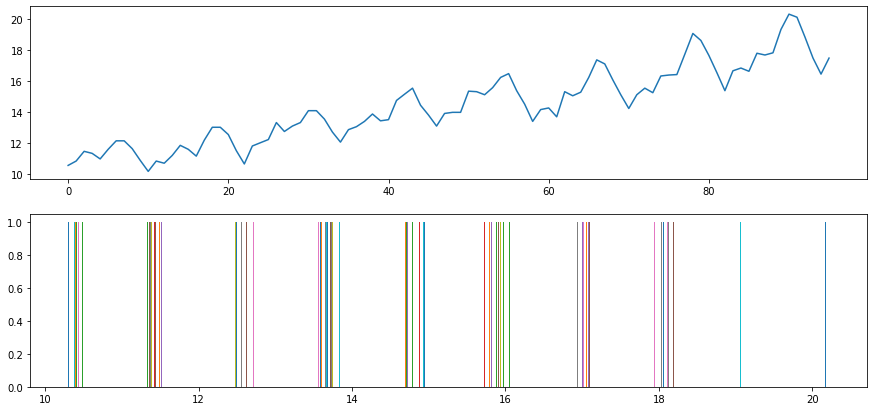

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(211)
plt.plot(data1)
plt.subplot(212)
plt.hist(data1)
plt.show()

In [ ]:
data2=DataFrame(data.values)
data2.columns=['Passengers']
data2['Passengers']=log(data2['Passengers'])
data2

,Passengers
0,4.718499
1,4.770685
2,4.882802
3,4.859812
4,4.795791
...,...
91,6.003887
92,5.872118
93,5.723585
94,5.602119


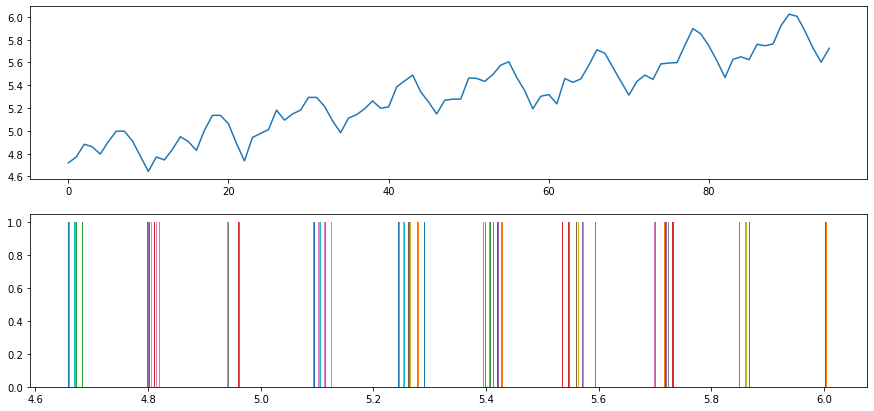

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(211)
plt.plot(data2)
plt.subplot(212)
plt.hist(data2)
plt.show()

In [ ]:
data['t']=np.arange(1,97)
data['t_sqr']=data['t']**2
data['log_pass']=np.log(data['Passengers'])

In [ ]:
data

,Passengers,t,t_sqr,log_pass
Month,,,,
1995-01-01,112,1,1,4.718499
1995-02-01,118,2,4,4.770685
1995-03-01,132,3,9,4.882802
1995-04-01,129,4,16,4.859812
1995-05-01,121,5,25,4.795791
...,...,...,...,...
2002-08-01,405,92,8464,6.003887
2002-09-01,355,93,8649,5.872118
2002-10-01,306,94,8836,5.723585


In [ ]:
Train=data.head(84)
Test=data.tail(12)

In [ ]:
Train

,Passengers,t,t_sqr,log_pass
Month,,,,
1995-01-01,112,1,1,4.718499
1995-02-01,118,2,4,4.770685
1995-03-01,132,3,9,4.882802
1995-04-01,129,4,16,4.859812
1995-05-01,121,5,25,4.795791
...,...,...,...,...
2001-08-01,347,80,6400,5.849325
2001-09-01,312,81,6561,5.743003
2001-10-01,274,82,6724,5.613128


In [ ]:
Test

,Passengers,t,t_sqr,log_pass
Month,,,,
2002-01-01,284,85,7225,5.648974
2002-02-01,277,86,7396,5.624018
2002-03-01,317,87,7569,5.758902
2002-04-01,313,88,7744,5.746203
2002-05-01,318,89,7921,5.762051
2002-06-01,374,90,8100,5.924256
2002-07-01,413,91,8281,6.023448
2002-08-01,405,92,8464,6.003887
2002-09-01,355,93,8649,5.872118


In [ ]:
import statsmodels.formula.api as smf

In [ ]:
lm=smf.ols('Passengers~t',data=Train).fit()
pred1=pd.Series(lm.predict(pd.DataFrame(Test['t'])))
rmse_lm = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred1))**2))
rmse_lm

53.19923653480278

In [ ]:
exp=smf.ols('log_pass~t',data=Train).fit()
pred2=pd.Series(exp.predict(pd.DataFrame(Test['t'])))
rmse_exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred2)))**2))
rmse_exp

46.05736110315654

In [ ]:
qm=smf.ols('Passengers~t+t_sqr',data=Train).fit()
pred3=pd.Series(qm.predict(pd.DataFrame(Test[['t','t_sqr']])))
rmse_qm = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred3))**2))
rmse_qm

48.05188897933164

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

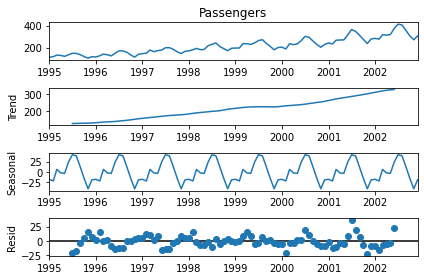

In [ ]:
dec=seasonal_decompose(data.Passengers,period=12)
dec.plot()
plt.show()

In [ ]:
ses=SimpleExpSmoothing(Train['Passengers']).fit(smoothing_level=0.2)
pred4=ses.predict(start=Test.index[0],end=Test.index[-1])
rmse_ses = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred4))**2))
rmse_ses

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


64.84476396990497

In [ ]:
hlm= Holt(Train['Passengers']).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred5 = hlm.predict(start = Test.index[0],end = Test.index[-1])
rmse_hlm = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred5))**2))
rmse_hlm

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
<ipython-input-23-347f5c40a83e>:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  hlm= Holt(Train['Passengers']).fit(smoothing_level=0.8, smoothing_slope=0.2)


95.76674452675282

In [ ]:
hlma = ExponentialSmoothing(Train['Passengers'],seasonal="add",trend="add",seasonal_periods=12).fit() 
pred6 = hlma.predict(start = Test.index[0],end = Test.index[-1])
rmse_hlma = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred6))**2))
rmse_hlma

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


28.8095571658956

In [ ]:
hlmm = ExponentialSmoothing(Train['Passengers'],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred7 = hlmm.predict(start = Test.index[0],end = Test.index[-1])
rmse_hlmm = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred7))**2))
rmse_hlmm

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


12.92103708997501

In [ ]:
df = {"MODEL":pd.Series(['Linear','exponential','Quadratic','Simple Exponential','Holt','Holt Winter add','Holt Winter Mul']),"RMSE_Values":pd.Series([rmse_lm,rmse_exp,rmse_qm,rmse_ses,rmse_hlm,rmse_hlma,rmse_hlmm])}
table_rmse=pd.DataFrame(df)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,Holt Winter Mul,12.921037
5,Holt Winter add,28.809557
1,exponential,46.057361
2,Quadratic,48.051889
0,Linear,53.199237
3,Simple Exponential,64.844764
4,Holt,95.766745


In [ ]:
final=ExponentialSmoothing(data['Passengers'],seasonal="add",trend="add",seasonal_periods=12).fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [ ]:
final.forecast(12)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


2003-01-01    319.234886
2003-02-01    311.527891
2003-03-01    350.278075
2003-04-01    346.984195
2003-05-01    351.844121
2003-06-01    403.924848
2003-07-01    440.565979
2003-08-01    427.445771
2003-09-01    376.627413
2003-10-01    329.766583
2003-11-01    296.560178
2003-12-01    341.113243
Freq: MS, dtype: float64

In [ ]:
#COCA-COLA
Coca=pd.read_excel('/content/sample_data/CocaCola_Sales_Rawdata.xlsx')
Coca

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [ ]:
Coca.shape

(42, 2)

In [ ]:
Coca['Quarters'] = 0
Coca['Year'] = 0
for i in range(42):
    r = Coca["Quarter"][i]
    Coca['Quarters'][i]= r[0:2]
    Coca['Year'][i]= r[3:5]

<ipython-input-31-bc5a361c1a3e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Coca['Quarters'][i]= r[0:2]
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
<ipython-input-31-bc5a361c1a3e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Coca['Year'][i]= r[3:5]


In [ ]:
Coca.head()

,Quarter,Sales,Quarters,Year
0,Q1_86,1734.827000,Q1,86
1,Q2_86,2244.960999,Q2,86
2,Q3_86,2533.804993,Q3,86
3,Q4_86,2154.962997,Q4,86
4,Q1_87,1547.818996,Q1,87


In [ ]:
Coca1=pd.DataFrame(pd.get_dummies(Coca['Quarters']))
Coca1

,Q1,Q2,Q3,Q4
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0
5,0,1,0,0
6,0,0,1,0
7,0,0,0,1
8,1,0,0,0
9,0,1,0,0


In [ ]:
tata=pd.concat([Coca,Coca1],axis=1)
tata

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,86,1,0,0,0
1,Q2_86,2244.960999,Q2,86,0,1,0,0
2,Q3_86,2533.804993,Q3,86,0,0,1,0
3,Q4_86,2154.962997,Q4,86,0,0,0,1
4,Q1_87,1547.818996,Q1,87,1,0,0,0
5,Q2_87,2104.411995,Q2,87,0,1,0,0
6,Q3_87,2014.362999,Q3,87,0,0,1,0
7,Q4_87,1991.746998,Q4,87,0,0,0,1
8,Q1_88,1869.049999,Q1,88,1,0,0,0
9,Q2_88,2313.631996,Q2,88,0,1,0,0


In [ ]:
tata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Quarter   42 non-null     object 
 1   Sales     42 non-null     float64
 2   Quarters  42 non-null     object 
 3   Year      42 non-null     int64  
 4   Q1        42 non-null     uint8  
 5   Q2        42 non-null     uint8  
 6   Q3        42 non-null     uint8  
 7   Q4        42 non-null     uint8  
dtypes: float64(1), int64(1), object(2), uint8(4)
memory usage: 1.6+ KB


In [ ]:
fd=tata.drop(['Quarters','Quarter','Year'],axis=1)
fd

,Sales,Q1,Q2,Q3,Q4
0,1734.827000,1,0,0,0
1,2244.960999,0,1,0,0
2,2533.804993,0,0,1,0
3,2154.962997,0,0,0,1
4,1547.818996,1,0,0,0
5,2104.411995,0,1,0,0
6,2014.362999,0,0,1,0
7,1991.746998,0,0,0,1
8,1869.049999,1,0,0,0
9,2313.631996,0,1,0,0


In [ ]:
fd['t']=np.arange(1,43)
fd['t_sqr']=fd['t']**2
fd['log_sales']=np.log(fd['Sales'])

In [ ]:
fd

,Sales,Q1,Q2,Q3,Q4,t,t_sqr,log_sales
0,1734.827000,1,0,0,0,1,1,7.458663
1,2244.960999,0,1,0,0,2,4,7.716443
2,2533.804993,0,0,1,0,3,9,7.837477
3,2154.962997,0,0,0,1,4,16,7.675529
4,1547.818996,1,0,0,0,5,25,7.344602
5,2104.411995,0,1,0,0,6,36,7.651791
6,2014.362999,0,0,1,0,7,49,7.608058
7,1991.746998,0,0,0,1,8,64,7.596767
8,1869.049999,1,0,0,0,9,81,7.533186
9,2313.631996,0,1,0,0,10,100,7.746574


In [ ]:
train=fd.head(38)
test=fd.tail(4)

In [ ]:
train

,Sales,Q1,Q2,Q3,Q4,t,t_sqr,log_sales
0,1734.827000,1,0,0,0,1,1,7.458663
1,2244.960999,0,1,0,0,2,4,7.716443
2,2533.804993,0,0,1,0,3,9,7.837477
3,2154.962997,0,0,0,1,4,16,7.675529
4,1547.818996,1,0,0,0,5,25,7.344602
5,2104.411995,0,1,0,0,6,36,7.651791
6,2014.362999,0,0,1,0,7,49,7.608058
7,1991.746998,0,0,0,1,8,64,7.596767
8,1869.049999,1,0,0,0,9,81,7.533186
9,2313.631996,0,1,0,0,10,100,7.746574


In [ ]:
test

,Sales,Q1,Q2,Q3,Q4,t,t_sqr,log_sales
38,4895.0,0,0,1,0,39,1521,8.495970
39,4333.0,0,0,0,1,40,1600,8.374015
40,4194.0,1,0,0,0,41,1681,8.341410
41,5253.0,0,1,0,0,42,1764,8.566555


In [ ]:
import statsmodels.formula.api as smf

In [ ]:
lmd=smf.ols('Sales~t',data=train).fit()
pred1=pd.Series(lmd.predict(pd.DataFrame(test['t'])))
rmse_lmd = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred1))**2))
rmse_lmd

591.553295722396

In [ ]:
expd=smf.ols('log_sales~t',data=train).fit()
pred2=pd.Series(expd.predict(pd.DataFrame(test['t'])))
rmse_expd = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred2)))**2))
rmse_expd

466.2479731067161

In [ ]:
qmd=smf.ols('Sales~t+t_sqr',data=train).fit()
pred3=pd.Series(qmd.predict(pd.DataFrame(test[['t','t_sqr']])))
rmse_qmd = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred3))**2))
rmse_qmd

475.56183518315606

In [ ]:
addd = smf.ols('Sales~Q1+Q2+Q3+Q4',data=train).fit()
pred4 = pd.Series(addd.predict(test[['Q1', 'Q2', 'Q3','Q4']]))
rmse_addd = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred4))**2))
rmse_addd

1860.0238154547274

In [ ]:
addqd = smf.ols('Sales~t+t_sqr+Q1+Q2+Q3+Q4',data=train).fit()
pred5 = pd.Series(addqd.predict(test[['Q1','Q2','Q3','Q4','t','t_sqr']]))
rmse_addqd = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred5))**2))
rmse_addqd

301.73800719349674

In [ ]:
muld = smf.ols('log_sales~Q1+Q2+Q3+Q4',data=train).fit()
pred6 = pd.Series(muld.predict(test))
rmse_muld = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred6)))**2))
rmse_muld

1963.3896400779668

In [ ]:
mulad = smf.ols('log_sales~t+Q1+Q2+Q3+Q4',data = train).fit()
pred7 = pd.Series(mulad .predict(test[['Q1','Q2','Q3','Q4','t']]))
rmse_mulad = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred7)))**2))
rmse_mulad

225.52439049827947

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

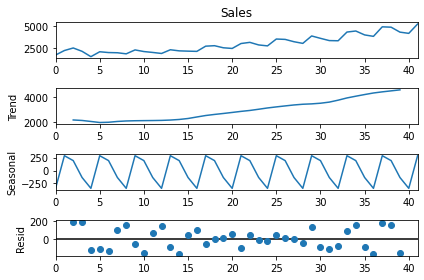

In [ ]:
dec=seasonal_decompose(fd.Sales,period=4)
dec.plot()
plt.show()

In [ ]:
sesd=SimpleExpSmoothing(train['Sales']).fit(smoothing_level=0.2)
pred8=sesd.predict(start=test.index[0],end=test.index[-1])
rmse_sesd = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred8))**2))
rmse_sesd

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


776.4804347641681

In [ ]:
hlmd= Holt(train['Sales']).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred9 = hlmd.predict(start = test.index[0],end = test.index[-1])
rmse_hlmd = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred9))**2))
rmse_hlmd

<ipython-input-53-e28d31e1f19b>:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  hlmd= Holt(train['Sales']).fit(smoothing_level=0.8, smoothing_slope=0.2)


686.6693365961074

In [ ]:
hlmad = ExponentialSmoothing(train['Sales'],seasonal="add",trend="add",seasonal_periods=4).fit() 
pred10 = hlmad.predict(start = test.index[0],end = test.index[-1])
rmse_hlmad = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred10))**2))
rmse_hlmad

150.52183591348953

In [ ]:
hlmmd = ExponentialSmoothing(train['Sales'],seasonal="mul",trend="add",seasonal_periods=4).fit() 
pred11 = hlmmd.predict(start = test.index[0],end = test.index[-1])
rmse_hlmmd = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred11))**2))
rmse_hlmmd

142.30353468791282

In [ ]:
st = {"MODEL":pd.Series(['Linear','exponential','Quadratic','Additive','Additive & Quad','Multiplicative','Multiplicative & Quad','Simple Exponential','Holt','Holt Winter add','Holt Winter Mul']),"RMSE_Values":pd.Series([rmse_lmd,rmse_expd,rmse_qmd,rmse_addd,rmse_addqd,rmse_muld,rmse_mulad,rmse_sesd,rmse_hlmd,rmse_hlmad,rmse_hlmmd])}
table_rmse=pd.DataFrame(st)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
10,Holt Winter Mul,142.303535
9,Holt Winter add,150.521836
6,Multiplicative & Quad,225.524390
4,Additive & Quad,301.738007
1,exponential,466.247973
2,Quadratic,475.561835
0,Linear,591.553296
8,Holt,686.669337
7,Simple Exponential,776.480435
3,Additive,1860.023815


In [ ]:
fnl=ExponentialSmoothing(fd['Sales'],seasonal="add",trend="add",seasonal_periods=4).fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [ ]:
fnl.forecast(8)

42    5209.703418
43    4684.532094
44    4573.170233
45    5661.700735
46    5593.184862
47    5068.013538
48    4956.651676
49    6045.182178
dtype: float64